In [9]:
# Import các thư viện cần thiết
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
#from sklearn.datasets import load_boston  # Removed load_boston

# Instead of load_boston, fetch the data manually:
import pandas as pd
import numpy as np


In [ ]:
# you can using url under or using dowload housing_price_dataset.csv on kaggle

# in Carnegie Mellon (CMU) : http://lib.stat.cmu.edu/datasets/boston

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

# Create a DataFrame similar to the original load_boston
data = pd.DataFrame(data, columns=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT'])
data['MEDV'] = target # Add target variable to DataFrame

<>:6: SyntaxWarning: invalid escape sequence '\s'
<>:6: SyntaxWarning: invalid escape sequence '\s'
C:\Users\trong\AppData\Local\Temp\ipykernel_33044\3540259935.py:6: SyntaxWarning: invalid escape sequence '\s'
  raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)


FileNotFoundError: [Errno 2] No such file or directory: 'DataSet/boston.txt'

In [ ]:
# Bước 2: Khám phá dữ liệu
print(data.head())
print(data.describe())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  
             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    

In [ ]:
# Bước 3: Chọn đặc trưng (X) và nhãn (y)
X = data[['RM', 'LSTAT', 'PTRATIO']]  # RM: số phòng, LSTAT: % dân số có thu nhập thấp, PTRATIO: tỷ lệ học sinh/giáo viên
y = data['MEDV']  # MEDV: Giá trung bình của các ngôi nhà


In [ ]:
# Bước 4: Chia dữ liệu thành tập huấn luyện và tập kiểm thử
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:

# Bước 5: Xây dựng mô hình hồi quy tuyến tính
model = LinearRegression()
model.fit(X_train, y_train)



LinearRegression()

In [ ]:
# Bước 6: Dự đoán trên tập kiểm thử
y_pred = model.predict(X_test)



In [ ]:
# Bước 7: Đánh giá mô hình
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 27.114957415580573


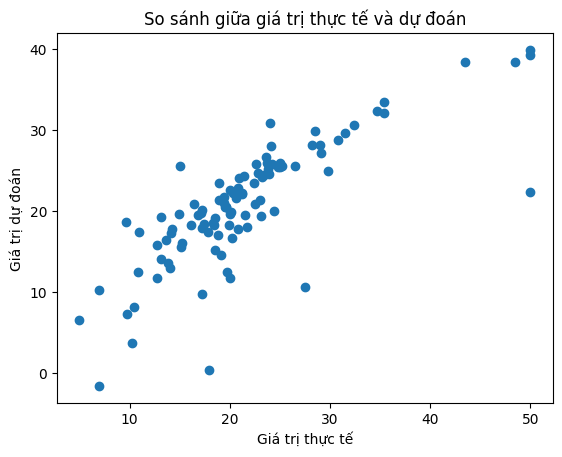

Hệ số hồi quy: [ 4.93311836 -0.56712588 -0.86709475]
Hệ số chặn: 14.588099261571081


In [ ]:
# Vẽ biểu đồ so sánh giá trị thực tế và dự đoán
plt.scatter(y_test, y_pred)
plt.xlabel('Giá trị thực tế')
plt.ylabel('Giá trị dự đoán')
plt.title('So sánh giữa giá trị thực tế và dự đoán')
plt.show()

# In ra các hệ số của mô hình
print(f'Hệ số hồi quy: {model.coef_}')
print(f'Hệ số chặn: {model.intercept_}')